In [1]:
import numpy as np  
import matplotlib.pyplot as plt
import math

In [2]:
'''

Let us implement a logistic regression model to predict whether a student gets admitted into a university.
That is, we want to implement the model that gives us the probability of student getting admitted into a university.

The following data consists of scores for two exams for each student and the status whether that student got admitted 
or not.
'''

data = np.array([[34.62365962451697,78.0246928153624,0],
[30.28671076822607,43.89499752400101,0],
[35.84740876993872,72.90219802708364,0],
[60.18259938620976,86.30855209546826,1],
[79.0327360507101,75.3443764369103,1],
[45.08327747668339,56.3163717815305,0],
[61.10666453684766,96.51142588489624,1],
[75.02474556738889,46.55401354116538,1],
[76.09878670226257,87.42056971926803,1],
[84.43281996120035,43.53339331072109,1],
[95.86155507093572,38.22527805795094,0],
[75.01365838958247,30.60326323428011,0],
[82.30705337399482,76.48196330235604,1],
[69.36458875970939,97.71869196188608,1],
[39.53833914367223,76.03681085115882,0],
[53.9710521485623,89.20735013750205,1],
[69.07014406283025,52.74046973016765,1],
[67.94685547711617,46.67857410673128,0],
[70.66150955499435,92.92713789364831,1],
[76.97878372747498,47.57596364975532,1],
[67.37202754570876,42.83843832029179,0],
[89.67677575072079,65.79936592745237,1],
[50.534788289883,48.85581152764205,0],
[34.21206097786789,44.20952859866288,0],
[77.9240914545704,68.9723599933059,1],
[62.27101367004632,69.95445795447587,1],
[80.1901807509566,44.82162893218353,1],
[93.114388797442,38.80067033713209,0],
[61.83020602312595,50.25610789244621,0],
[38.78580379679423,64.99568095539578,0],
[61.379289447425,72.80788731317097,1],
[85.40451939411645,57.05198397627122,1],
[52.10797973193984,63.12762376881715,0],
[52.04540476831827,69.43286012045222,1],
[40.23689373545111,71.16774802184875,0],
[54.63510555424817,52.21388588061123,0],
[33.91550010906887,98.86943574220611,0],
[64.17698887494485,80.90806058670817,1],
[74.78925295941542,41.57341522824434,0],
[34.1836400264419,75.2377203360134,0],
[83.90239366249155,56.30804621605327,1],
[51.54772026906181,46.85629026349976,0],
[94.44336776917852,65.56892160559052,1],
[82.36875375713919,40.61825515970618,0],
[51.04775177128865,45.82270145776001,0],
[62.22267576120188,52.06099194836679,0],
[77.19303492601364,70.45820000180959,1],
[97.77159928000232,86.7278223300282,1],
[62.07306379667647,96.76882412413983,1],
[91.56497449807442,88.69629254546599,1],
[79.94481794066932,74.16311935043758,1],
[99.2725269292572,60.99903099844988,1],
[90.54671411399852,43.39060180650027,1],
[34.52451385320009,60.39634245837173,0],
[50.2864961189907,49.80453881323059,0],
[49.58667721632031,59.80895099453265,0],
[97.64563396007767,68.86157272420604,1],
[32.57720016809309,95.59854761387875,0],
[74.24869136721598,69.82457122657193,1],
[71.79646205863379,78.45356224515052,1],
[75.3956114656803,85.75993667331619,1],
[35.28611281526193,47.02051394723416,0]])

X_train = data[:, [0, 1]]
y_train = data[:, -1]

In [3]:
print(f'Dimensions of X_train: {X_train.shape}')
print(f'Dimensions of y_train: {y_train.shape}')

Dimensions of X_train: (62, 2)
Dimensions of y_train: (62,)


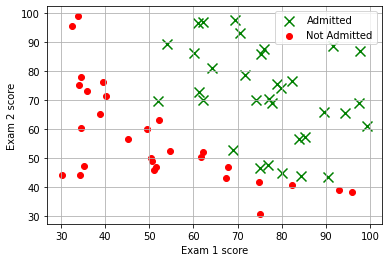

In [4]:
# Let us visualize the data before implementing the logistic regression

postives_exam1 = X_train[y_train == 1][:, 0]
negatives_exam1 = X_train[y_train == 0][:, 0]

postives_exam2 = X_train[y_train == 1][:, 1]
negatives_exam2 = X_train[y_train == 0][:, 1]

plt.scatter(postives_exam1, postives_exam2, c='g', marker='x', s=100, label='Admitted')
plt.scatter(negatives_exam1, negatives_exam2, c='r', label='Not Admitted')
plt.xlabel('Exam 1 score'); plt.ylabel('Exam 2 score')
plt.grid()
plt.legend()
plt.show()

In [5]:
# Sigmoid function implementation
def sigmoid(z):
    '''
    Computes sigmoid value for z

    Args:
        z: a scalar or an (ndarray) of any size

    Returns:
        g: a scalar or an (ndarray) of the same size as the input
    '''

    g = 1 / (1 + np.exp(-z))

    return g

In [6]:
sig = np.array([0, 1, 0.4, 2])
print(f'sigmoid({sig}) = {sigmoid(sig)}')

sigmoid([0.  1.  0.4 2. ]) = [0.5        0.73105858 0.59868766 0.88079708]


In [7]:
def compute_cost(X, y, w, b):
    '''
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (array_like Shape (m,)) target value 
      w : (array_like Shape (n,)) Values of parameters of the model      
      b : scalar Values of bias parameter of the model
    Returns:
      total_cost: (scalar)         cost 
    '''

    m, n = X.shape
    positive_losses = -1 * np.log(sigmoid(np.dot(X[y == 1], w) + b))
    negative_losses = -1 * np.log(1 - sigmoid(np.dot(X[y == 0], w) + b))

    cost_sum = np.sum(positive_losses) + np.sum(negative_losses)
    total_cost = cost_sum / m

    return total_cost

In [8]:
test_w = np.array([0.2, 0.2])
test_b = -24.
cost = compute_cost(X_train, y_train, test_w, test_b)

print('Cost at test w and b: {:.3f}'.format(cost))

Cost at test w and b: 0.266


In [9]:
def compute_gradient(X, y, w, b):
    m = X.shape[0]
    dj_dw = np.zeros(w.shape)
    dj_db = 0

    fwb = sigmoid(np.dot(X, w) + b)
    difference = fwb - y

    for i in range(w.shape[0]):    
        dj_dw[i] = np.sum(difference * X[:, i]) / m

    dj_db = np.sum(difference) / m
    return dj_dw, dj_db


compute_gradient(X_train[:4], y_train[:4], np.array([1, 1]), 1)

(array([25.18944479, 48.70547209]), 0.75)

In [10]:
def update_parameters(X, y, w, b, lr):
    dj_dw, dj_db = compute_gradient(X, y, w, b)
    tmp_w = w - lr * dj_dw
    tmp_b = b - lr * dj_db

    return tmp_w, tmp_b, dj_dw, dj_db

In [13]:
def gradient_descent(X, y, w, b, lr, iterations):
    costs = np.zeros(iterations)
    dj_dw = np.zeros((iterations, w.shape[0]))
    dj_db = np.zeros(iterations)
    w_store = np.zeros((iterations, w.shape[0]))    
    b_store = np.zeros(iterations)

    for i in range(iterations):
        cost = compute_cost(X, y, w, b)
        costs[i] = cost

        print(f'Current cost: {cost}')
        w, b, djdw, djdb = update_parameters(X, y, w, b, lr)
        dj_dw[i] = djdw; dj_db[i] = djdb; w_store[i] = w; b_store[i] = b

    return w_store[-1], b_store[-1]

initial_w = 0.01 * (np.random.rand(2).reshape(2,) - 0.5)
initial_b = -8
w, b = gradient_descent(X_train, y_train, initial_w, initial_b, 0.001, 100)

print(f'Parameters found after running GD: w, b = {w, b}')

Current cost: 4.301051192682257
Current cost: 1.2586334615907633
Current cost: 0.4131308357074679
Current cost: 0.3235115551700944
Current cost: 0.32159578153718693
Current cost: 0.32100982554648033
Current cost: 0.3206322253964795
Current cost: 0.32032150717292535
Current cost: 0.3200576498496574
Current cost: 0.31983268021839584
Current cost: 0.3196407223827904
Current cost: 0.3194768693140248
Current cost: 0.3193369583277367
Current cost: 0.3192174507012385
Current cost: 0.31911533645858153
Current cost: 0.3190280543569565
Current cost: 0.31895342417042266
Current cost: 0.3188895893214985
Current cost: 0.3188349682618655
Current cost: 0.31878821325306794
Current cost: 0.31874817540725525
Current cost: 0.3187138750246914
Current cost: 0.31868447641435754
Current cost: 0.31865926651037074
Current cost: 0.31863763670367395
Current cost: 0.3186190673984911
Current cost: 0.31860311487899456
Current cost: 0.31858940013567644
Current cost: 0.3185775993549381
Current cost: 0.318567435820974

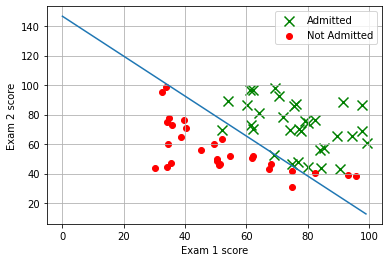

In [17]:
# Plotting the decision boundary using the learned parameters
plt.plot(np.arange(100), -(w[0]/w[1]) * np.arange(100) - (b/w[1]))
plt.scatter(postives_exam1, postives_exam2, c='g',
            marker='x', s=100, label='Admitted')
plt.scatter(negatives_exam1, negatives_exam2, c='r', label='Not Admitted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.grid()
plt.legend()
plt.show()